In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani

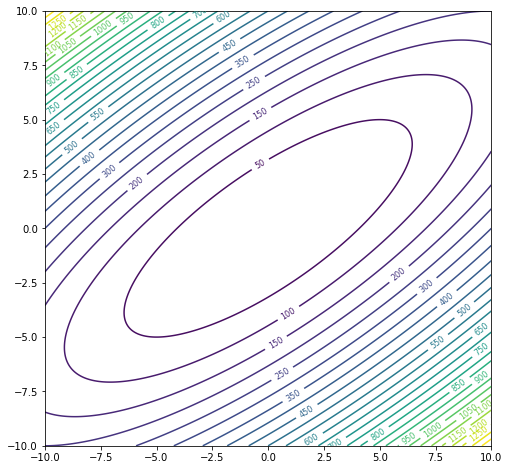

In [8]:
# グラフの範囲を指定
x_low  = -10
x_high = 10
y_low  = -10
y_high = 10

# 格子状に分割した各座標を作成
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# 関数に従い曲面を作成
Z = (3 * X ** 2) + (5 * Y ** 2) - (6 * X * Y)

# 曲面の描画
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 50) # intervalを設定することで等高線を自由に設定できる
counter_plane = plt.contour(X, Y, Z, interval)
plt.clabel(counter_plane, inline=1, fontsize=8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.close()

## 勾配の計算
上記で指定した目的関数の勾配を計算するための関数を定義します

In [9]:
def get_grad_vec(x, y):
    grad_x = 6*x - 6*y
    grad_y = 10*y - 6*x
    return [grad_x, grad_y]

## 勾配降下の計算
任意の初期値から，勾配降下法によって目的関数の値が最小となる$x$, $y$を求めます．学習率lrは0.1とします．勾配の大きさがepsilon（ここでは0.001）より小さくなったら，収束したと判定し繰り返し処理を終了します．NeRFのコードでもすでに学習が完了しているにも関わらず続行しているのがあるのでこちらの考えが適用できるかも

In [10]:
# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 0.05
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:       
        break

    xs = n_xs
    ys = n_ys

print(step, ":", diff)

100 : 0.0018602103636333556


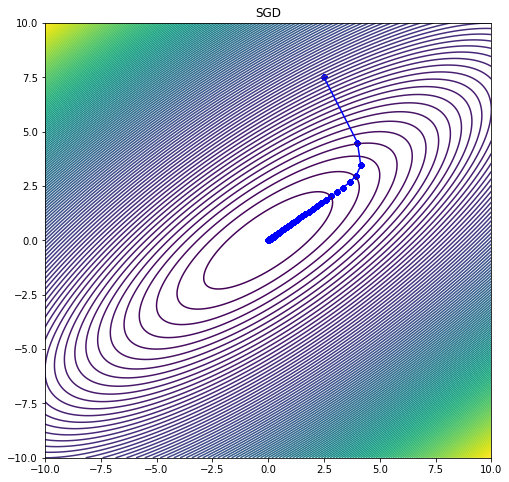

In [11]:
def plot(xs, ys, nxs, nys, txt):
  plt.figure(figsize=(8, 8))
  plt.title(txt)
  interval = np.arange(np.min(Z), np.max(Z), 10.)
  plt.contour(X, Y, Z, interval)
  for i in range(len(xs) - 1):
    plt.plot([xs[i-1], nxs[i-1]], [ys[i-1], nys[i-1]], c='b')
    plt.scatter(xs, ys, s=20, c="b")
  
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.show()
  plt.close()

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'SGD')

## 課題
1. 学習率を変更して，収束する様子とステップ数を比較してみましょう
2. 初期値を変更して，収束する様子を確認してみよう

In [16]:
# 初期値の設定
init_x = 0
init_y = 10

# 学習率・終了条件の設定
lr = 0.1
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:       
        break

    xs = n_xs
    ys = n_ys

print(step, ":", diff)

52 : 0.0008501274820484871


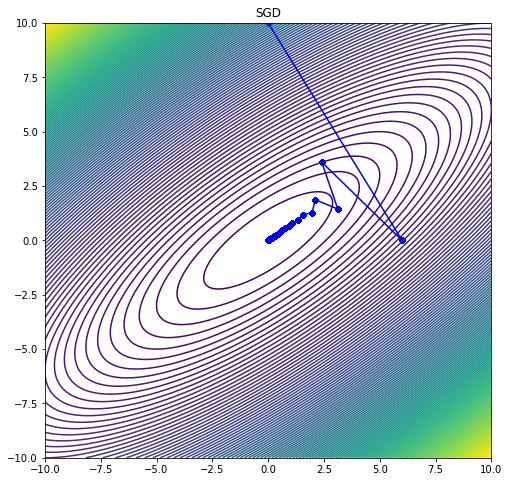

In [17]:
def plot(xs, ys, nxs, nys, txt):
  plt.figure(figsize=(8, 8))
  plt.title(txt)
  interval = np.arange(np.min(Z), np.max(Z), 10.)
  plt.contour(X, Y, Z, interval)
  for i in range(len(xs) - 1):
    plt.plot([xs[i-1], nxs[i-1]], [ys[i-1], nys[i-1]], c='b')
    plt.scatter(xs, ys, s=20, c="b")
  
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.show()
  plt.close()

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'SGD')

# Momentum（モーメンタム）

モーメンタムとは「運動量」という意味であり，パラメータ空間をボールが転がって極値にたどり着くように更新します．

$ {\bf v} \leftarrow \alpha {\bf v} - \eta \frac{\partial L}{{\partial \bf W}}$

${\bf W} \leftarrow {\bf W} + {\bf v}$

${\bf W}$ は更新する重みパラメータ，$\frac{\partial L}{{\partial \bf W}}$は${\bf W}$に関する損失関数の勾配，$\eta$は学習率，$ {\bf v} $は速度に対応します．
$\alpha$は１より小さい正の値を設定し，速度減衰のパラメータです．

任意の初期値から，モーメンタムによって目的関数の値が最小となる$x, y$を求めます．ここでは，$\alpha$は0.6，学習率lrは0.03とします．勾配の大きさがepsilon（ここでは0.001）より小さくなったら，収束したと判定し繰り返し処理を終了します．


49 : 0.0008663067100190521


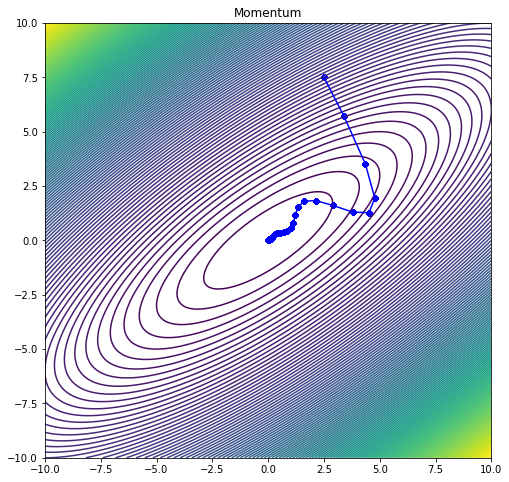

In [18]:
# Momentum

# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 0.03
epsilon = 0.001
alpha = 0.6

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
p_vx = 0
p_vy = 0
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    vx = alpha * p_vx - lr * grad_vec[0]
    vy = alpha * p_vy - lr * grad_vec[1]
    n_xs = xs + vx
    n_ys = ys + vy

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:
        break

    xs = n_xs
    ys = n_ys
    p_vx = vx
    p_vy = vy

print(step, ":", diff)

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'Momentum')

# AdaGrad

AdaGradは，極値ち近づくほど更新量が小さくなるように調整します．

$ {\bf h} \leftarrow  {\bf h} + \frac{\partial L}{{\partial \bf W}}  \odot \frac{\partial L}{{\partial \bf W}}$

${\bf W} \leftarrow {\bf W} - \eta  \frac{1}{{\sqrt{\bf h}}}\frac{\partial L}{{\partial \bf W}}$

${\bf W}$ は更新する重みパラメータ，$\frac{\partial L}{{\partial \bf W}}$は${\bf W}$に関する損失関数の勾配，$\eta$は学習率，$ {\bf h} $は勾配の二乗和を保持します．
$\odot$は行列の要素ごとの掛け算です．パラメータ更新の際に，$\frac{1}{{\sqrt{\bf h}}}$を乗算することで学習の更新量を調整します．勾配の二乗和が大きい時は，学習係数が小さくなります．学習の減衰をパラメータごとに制御できます．

任意の初期値から，AdaGradによって目的関数の値が最小となる$x, y$を求めます．ここでは，学習率lrは2.0とします．勾配の大きさがepsilon（ここでは0.001）より小さくなったら，収束したと判定し繰り返し処理を終了します．

100 : 0.012293909773114188


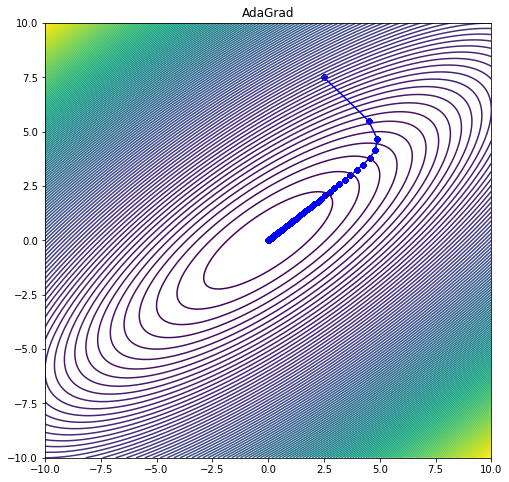

In [19]:
# AdaGrad

# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 2.0
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
p_hx = 0
p_hy = 0
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    hx = p_hx + grad_vec[0] * grad_vec[0]
    hy = p_hy + grad_vec[1] * grad_vec[1]
    n_xs = xs - lr * 1/(np.sqrt(hx) + 1e-7) * grad_vec[0]
    n_ys = ys - lr * 1/(np.sqrt(hy) + 1e-7) * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:
        break

    xs = n_xs
    ys = n_ys
    p_hx = hx
    p_hy = hy

print(step, ":", diff)

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'AdaGrad')

# Adam

Adamは，MomentumとAdaGradを融合した最適化手法です．

$ {\bf m} \leftarrow  \alpha {\bf m} + (1 - \alpha) \frac{\partial L}{{\partial \bf W}}$

$ {\bf v} \leftarrow  \beta {\bf v} + (1 - \beta) \frac{\partial L}{{\partial \bf W}} \odot \frac{\partial L}{{\partial \bf W}}$

$ \hat{\bf m} \leftarrow  \frac{\bf m}{1 - \alpha} $

$ \hat{\bf v} \leftarrow  \frac{\bf v}{1 - \beta} $

${\bf W} \leftarrow {\bf W} - \eta  \frac{1}{{\sqrt{\hat{\bf v} + \epsilon}}} \hat{\bf m}$

${\bf W}$ は更新する重みパラメータ，$\frac{\partial L}{{\partial \bf W}}$は${\bf W}$に関する損失関数の勾配，$\eta$は学習率，$ \hat{\bf m}, \hat{\bf v}$は勾配と二乗勾配の不偏推定量となるように調整したものです。

任意の初期値から，Adamによって目的関数の値が最小となる$x, y$を求めます．ここでは，学習率lrは0.35とします．勾配の大きさがepsilon（ここでは0.001）より小さくなったら，収束したと判定し繰り返し処理を終了します．

100 : 0.14142217758564382


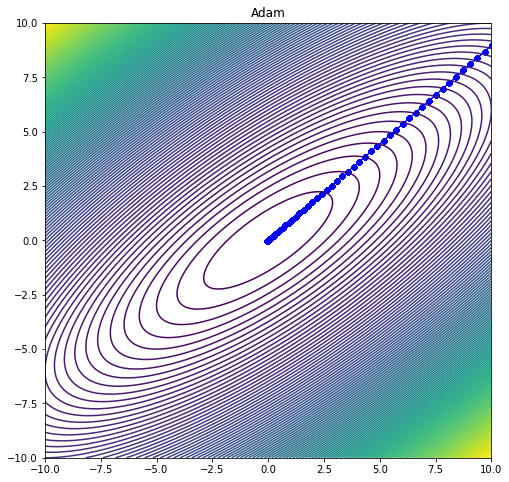

In [24]:
# Adam

# 初期値の設定
init_x = 22.5
init_y = 25.5

# 学習率・終了条件の設定
lr = 0.35
epsilon = 0.001
alpha = 0.7
beta = 0.9

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
p_mx = 0
p_my = 0
p_vx = 0
p_vy = 0
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    mx = alpha * p_mx + (1 - alpha) * grad_vec[0]
    my = alpha * p_my + (1 - alpha) * grad_vec[1]
    hat_mx = mx / (1 - alpha)
    hat_my = my / (1 - alpha)
    vx = beta * p_vx + (1 - beta) * grad_vec[0] * grad_vec[0]
    vy = beta * p_vy + (1 - beta) * grad_vec[1] * grad_vec[1]
    hat_vx = vx / (1 - beta)
    hat_vy = vy / (1 - beta)

    n_xs = xs - lr * hat_mx / (np.sqrt(hat_vx + 1e-7)) 
    n_ys = ys - lr * hat_my / (np.sqrt(hat_vy + 1e-7)) 

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:
        break

    xs = n_xs
    ys = n_ys
    p_mx = mx
    p_my = my
    p_vx = vx
    p_vy = vy

print(step, ":", diff)

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'Adam')